# RIP.ie daily death data (v2)

* rip.ie
* http://dmnfarrell.github.io/
* https://data.gov.ie/dataset/list-of-nursing-homes-in-ireland/resource/489aad00-cad1-41d7-92bf-8b5cdd9d61ea
* https://data.gov.ie/dataset/62954fa3-1492-48af-93d1-5c9bf6a14d1e/resource/142d3b64-8f02-4ed7-bfbd-dc3e20420f3f#&r=C01885V02316&c=STATISTIC


In [177]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates

pd.set_option('display.width', 150)
locator = mdates.AutoDateLocator(minticks=4, maxticks=10)
formatter = mdates.ConciseDateFormatter(locator)
sns.set_style("white")
sns.set_context('talk')
pd.set_option('display.width', 120)
pd.set_option('display.max_colwidth', 500)

In [260]:
df = pd.read_pickle('rip_dn_scrape_processed.pkl')
df=df.dropna(subset=['date'])
df=df.drop_duplicates(['name','date','county'])
print (len(df))
df['date'] = pd.to_datetime(df.date,format='%d/%m/%Y',errors='coerce')
df.index=df.index.astype('int')
df.sort_index()
df['year'] = df.date.dt.year.astype(int)
df['month'] = df.date.dt.month
df['day'] = df.date.dt.dayofyear
df['week'] = df.date.dt.isocalendar().week
df = df[df.year>=2013]

272411


In [ ]:
nhomes = pd.read_csv('nursing_homes.csv')
#print (nhomes[:10])

def find_nhome(x):
    for i,r in nhomes.iterrows():
        if r.shortname in x.notice and x.county == r.county:
            return r['name']+','+r.county

x=df[:160]
#x['home'] = x.apply(lambda x: find_nhome(x),1)
#print (x)

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
x = 'Peacefully at Sligo University Hospital. Sadly missed by his Loving wife Catherine'
s = list(nhomes.name+' '+nhomes.county)
process.extract(x, s, limit=200)

year
2013    28586
2014    29334
2015    30763
2016    31876
2017    31806
2018    32855
2019    33070
2020    33979
2021    17533
dtype: int64


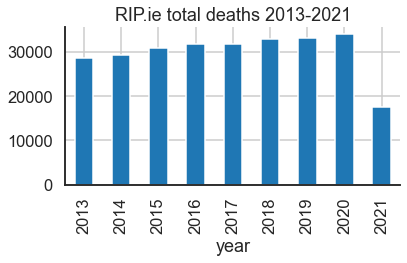

In [261]:
totals = df.groupby('year').agg('size')
print (totals)
ax=totals.plot(kind='bar',grid=True)
plt.title('RIP.ie total deaths 2013-2021')
sns.despine()
plt.tight_layout()
plt.savefig('ireland_deaths_ripie_summary_v2.png',dpi=120)

year
2013    28586.0
2014    29334.0
2015    30763.0
2016    31876.0
2017    31806.0
2018    32855.0
2019    33070.0
2020    33979.0
2021    17533.0
dtype: float64


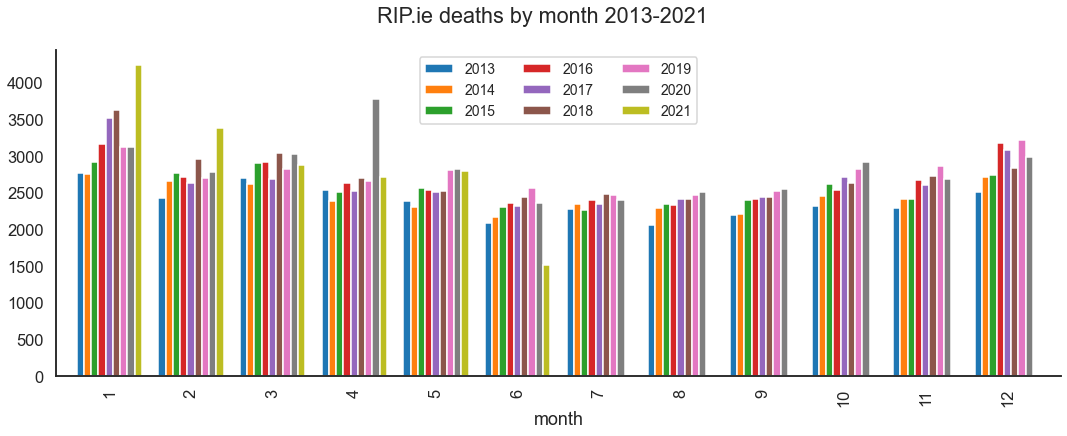

In [262]:
bymonth = pd.pivot_table(df, index='month',columns='year',values='name',aggfunc='size')
print (bymonth.sum())
bymonth.plot(kind='bar',width=.8,figsize=(18,6))
plt.legend(loc=9,ncol=3,fontsize=14)
plt.suptitle('RIP.ie deaths by month 2013-2021')
sns.despine()
plt.savefig('ireland_deaths_ripie_bymonth_v2.png',dpi=150)

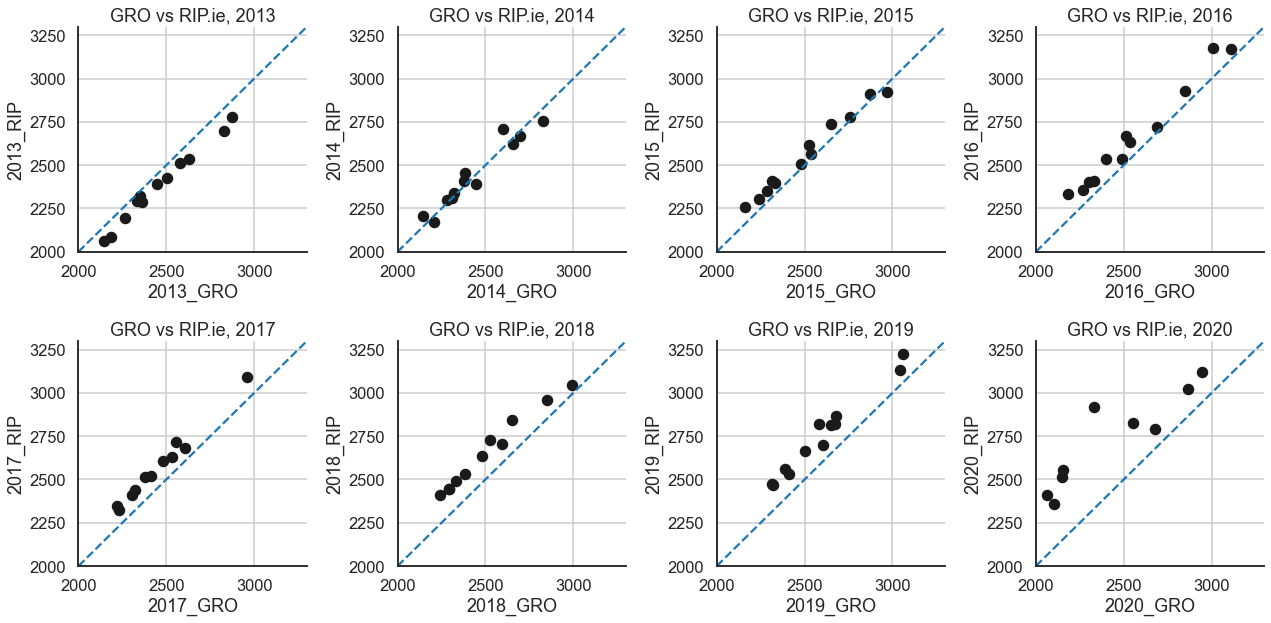

In [275]:
gro = pd.read_csv('gro_deaths.csv')
a=bymonth.reset_index()
a.columns=[str(i) for i in a.columns]
b=gro.merge(a,on='month',suffixes=['_GRO','_RIP'])
#b.sum().plot(kind='bar',figsize=(15,6))
#print (b.sum())
f,axs=plt.subplots(2,4,figsize=(18,9))
axs=axs.flat
i=0
for y in range(2013,2021):
    ax=axs[i]
    b.plot(x='%s_GRO' %y,y='%s_RIP' %y,c='0.1',s=100,kind='scatter',grid=True,ax=ax)
    ax.plot([2000, 3300], [2000, 3300], ls='--')
    ax.set_xlim(2000,3300)
    ax.set_ylim(2000,3300)
    ax.set_title('GRO vs RIP.ie, %s' %y)
    i+=1
sns.despine()
plt.tight_layout()
plt.savefig('ireland_deaths_gro_vs_ripie.png',dpi=150)

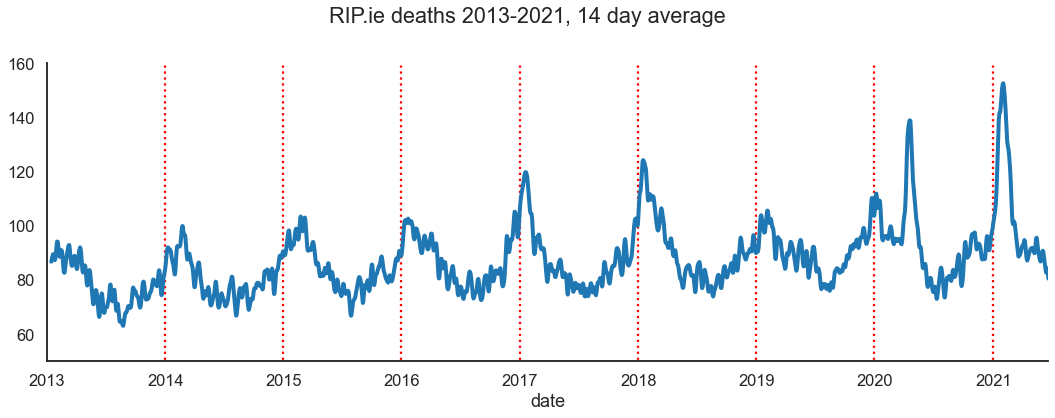

In [250]:
x = df.groupby('date').size()
ax=x.rolling(14,win_type='hamming').mean().plot(lw=4,figsize=(15,6),ylim=(50,160))
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
for y in range(2013,2021):
    ax.vlines(pd.to_datetime('%s-12-31' %y),0,160,color='r',ls=':')

plt.suptitle('RIP.ie deaths 2013-2021, 14 day average')
sns.despine()
plt.tight_layout()
plt.savefig('ireland_deaths_ripie_trend_v2.png',dpi=150)

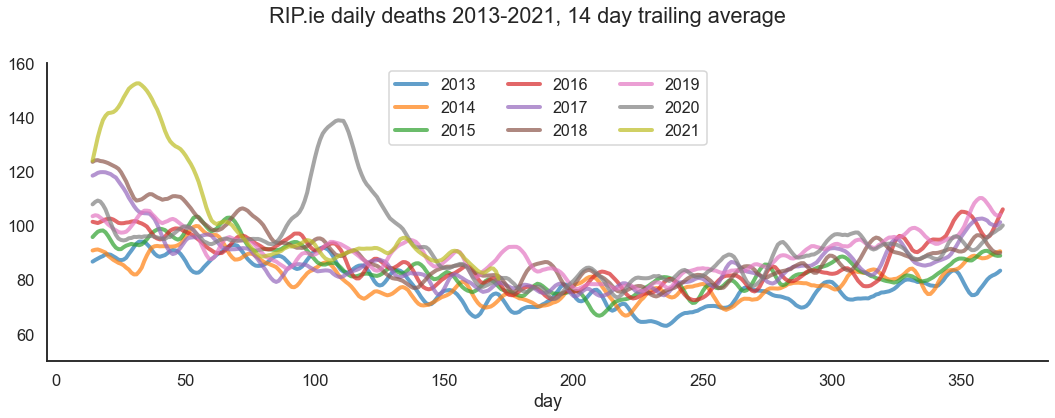

In [257]:
byday = pd.pivot_table(df, index='day',columns='year',values='name',aggfunc='size')
meanday = byday.rolling(window=14,win_type='hamming').mean()
meanday.plot(figsize=(15,6),ylim=(50,160),lw=4,alpha=0.7)
plt.legend(loc=9,ncol=3,fontsize=16)
sns.despine()
plt.suptitle('RIP.ie daily deaths 2013-2021, 14 day trailing average')
plt.tight_layout()
plt.savefig('ireland_deaths_ripie_compared_mean_v2.png',dpi=150)